In [1]:
import pandas as pd, numpy as np
import re
from matplotlib import pyplot as plt

In [51]:
def parse(file_path, pattern="Accuracy Score"):
    scores = []
    count = 0
    print (file_path)
    with open(file_path, 'r') as f:
        line = f.readline()
        while line:
            count = count + 1
            # print ("count : {0}".format(count))
            match = re.search(pattern + "\s*:* (\d*..*)", line)
            
            if match:
                score = float(match.group(1))
                # print ("score : {0}".format(score))
                scores.append(score)
            line = f.readline()

    return scores

In [4]:
def parse_metric(file_path):
    group_metrics = []
    with open(file_path, 'r') as f:
        message = f.readline()
        while message:            
            if message.startswith('REPORT'):
                duration = re.search(r'(?<=\tDuration:\s)(.*?)(?=\sms)', message).group(0)
                billed_duration = re.search(r'(?<=\tBilled\sDuration:\s)(.*?)(?=\sms)', message).group(0)

                # Megabytes
                memory_size = re.search(r'(?<=\tMemory\sSize:\s)(.*?)(?=\sMB)', message).group(0)
                max_memory_used = re.search(r'(?<=\tMax\sMemory\sUsed:\s)(.*?)(?=\sMB)', message).group(0)

                metrics = {
                    'duration': duration,
                    'billed_duration': billed_duration,
                    'memory_size': memory_size,
                    'max_memory_used':max_memory_used
                }
                group_metrics.append(metrics)

            message = f.readline()

    return group_metrics

In [12]:
def retrieve_result(file_path):
    total_duration = 0
    total_billed_duration = 0
    total_max_memory_used = 0
    max_memory_used = 0
    memory_size = 0
    group_metrics = parse_metric(file_path)
    invoke_time = len(group_metrics)

    for metrics in group_metrics:
        total_duration += float(metrics['duration'])
        total_billed_duration += float(metrics['billed_duration'])
        temp = int(metrics['max_memory_used'])
        total_max_memory_used = total_max_memory_used + temp
        
        if temp > max_memory_used:
            max_memory_used = temp
        memory_size = int(metrics['memory_size'])
    
    duration_per_invocation = total_duration / invoke_time
    compute_charge = total_billed_duration * 0.001 * (memory_size / 1024)
    
    # cost = compute charge + request charge
    cost = 0.00001667 * compute_charge

    # Other metrics can be calculated here:
    # Total / Average / Stdev of metrics
    

    metrics = {
        "total_duration" : total_duration, 
        "total_billed_duration" : total_billed_duration,
        "average_billed_duration" : total_billed_duration / invoke_time,
        "average_max_memory_used" : total_max_memory_used / invoke_time,
        "max_memory_used" : max_memory_used, 
        "memory_size" : memory_size, 
        "duration_per_invocation" : duration_per_invocation, 
        "compute_charge" : compute_charge,
        "cost" : cost,
        "invoke_time" : invoke_time
    }

    print (metrics)

## Metric Calculation

In [13]:
retrieve_result("../cloudwatch/Opt_Memory/Multi_Regression_log_255.txt")

{'total_duration': 5157876.78, 'total_billed_duration': 5170800.0, 'average_billed_duration': 20198.4375, 'average_max_memory_used': 310.4375, 'max_memory_used': 334, 'memory_size': 1472, 'duration_per_invocation': 20147.956171875, 'compute_charge': 7433.025000000001, 'cost': 0.12390852675000003, 'invoke_time': 256}


In [14]:
retrieve_result("../cloudwatch/Opt_Memory/Prophet_log_384.txt")

{'total_duration': 22830895.28000001, 'total_billed_duration': 22850200.0, 'average_billed_duration': 59505.729166666664, 'average_max_memory_used': 292.1276041666667, 'max_memory_used': 297, 'memory_size': 1664, 'duration_per_invocation': 59455.456458333356, 'compute_charge': 37131.575000000004, 'cost': 0.6189833552500001, 'invoke_time': 384}


In [15]:
retrieve_result("../cloudwatch/Opt_Memory/20_Test/Neural_Network_log_432.txt")

{'total_duration': 1804630.1600000008, 'total_billed_duration': 1827200.0, 'average_billed_duration': 4219.86143187067, 'average_max_memory_used': 288.8175519630485, 'max_memory_used': 306, 'memory_size': 2368, 'duration_per_invocation': 4167.737090069286, 'compute_charge': 4225.400000000001, 'cost': 0.07043741800000002, 'invoke_time': 433}


In [16]:
retrieve_result("../cloudwatch/Opt_Memory/20_Test/SVC_log_512.txt")

{'total_duration': 454958.9600000004, 'total_billed_duration': 482000.0, 'average_billed_duration': 941.40625, 'average_max_memory_used': 198.4375, 'max_memory_used': 206, 'memory_size': 2176, 'duration_per_invocation': 888.5917187500008, 'compute_charge': 1024.25, 'cost': 0.0170742475, 'invoke_time': 512}


In [17]:
retrieve_result("../cloudwatch/Opt_Memory/20_Test/XGBoost_log_768.txt")

{'total_duration': 10173669.949999997, 'total_billed_duration': 10210200.0, 'average_billed_duration': 13277.243172951885, 'average_max_memory_used': 194.7334200260078, 'max_memory_used': 201, 'memory_size': 1280, 'duration_per_invocation': 13229.739856957083, 'compute_charge': 12762.75, 'cost': 0.21275504250000002, 'invoke_time': 769}


## Max Memory Metric

In [32]:
retrieve_result("../cloudwatch/Max_Memory/Multi_Regression_log_max.txt")

{'total_duration': 2441901.7899999986, 'total_billed_duration': 2454600.0, 'average_billed_duration': 9625.882352941177, 'average_max_memory_used': 315.7450980392157, 'max_memory_used': 338, 'memory_size': 3008, 'duration_per_invocation': 9576.085450980387, 'compute_charge': 7210.3875, 'cost': 0.12019715962500001, 'invoke_time': 255}


In [33]:
retrieve_result("../cloudwatch/Max_Memory/Prophet_log_max.txt")

{'total_duration': 14711350.85999999, 'total_billed_duration': 14730500.0, 'average_billed_duration': 38360.677083333336, 'average_max_memory_used': 303.7552083333333, 'max_memory_used': 306, 'memory_size': 3008, 'duration_per_invocation': 38310.80953124997, 'compute_charge': 43270.84375, 'cost': 0.7213249653125, 'invoke_time': 384}


In [34]:
retrieve_result("../cloudwatch/Max_Memory/XGBoost_log_max.txt")

{'total_duration': 16912618.860000007, 'total_billed_duration': 16951500.0, 'average_billed_duration': 22072.265625, 'average_max_memory_used': 204.58072916666666, 'max_memory_used': 211, 'memory_size': 3008, 'duration_per_invocation': 22021.639140625008, 'compute_charge': 49795.03125, 'cost': 0.8300831709375001, 'invoke_time': 768}


In [35]:
retrieve_result("../cloudwatch/Max_Memory/Neural_Network_log_max.txt")

{'total_duration': 1413207.2400000005, 'total_billed_duration': 1434700.0, 'average_billed_duration': 3321.064814814815, 'average_max_memory_used': 290.0509259259259, 'max_memory_used': 306, 'memory_size': 3008, 'duration_per_invocation': 3271.3130555555567, 'compute_charge': 4214.431250000001, 'cost': 0.07025456893750001, 'invoke_time': 432}


In [36]:
retrieve_result("../cloudwatch/Max_Memory/SVC_log_max.txt")

{'total_duration': 452147.6500000001, 'total_billed_duration': 478700.0, 'average_billed_duration': 934.9609375, 'average_max_memory_used': 200.0, 'max_memory_used': 207, 'memory_size': 3008, 'duration_per_invocation': 883.1008789062502, 'compute_charge': 1406.1812499999999, 'cost': 0.0234410414375, 'invoke_time': 512}


In [63]:
xgboost_scores = parse("../cloudwatch/Opt_memory/20_Test/XGBoost_log_768.txt")
svc_scores = parse("../cloudwatch/Opt_memory/20_Test/SVC_log_512.txt")
neural_network_scores = parse("../cloudwatch/Opt_memory/20_Test/Neural_Network_log_432.txt")

../cloudwatch/Opt_memory/20_Test/XGBoost_log_768.txt
../cloudwatch/Opt_memory/20_Test/SVC_log_512.txt
../cloudwatch/Opt_memory/20_Test/Neural_Network_log_432.txt


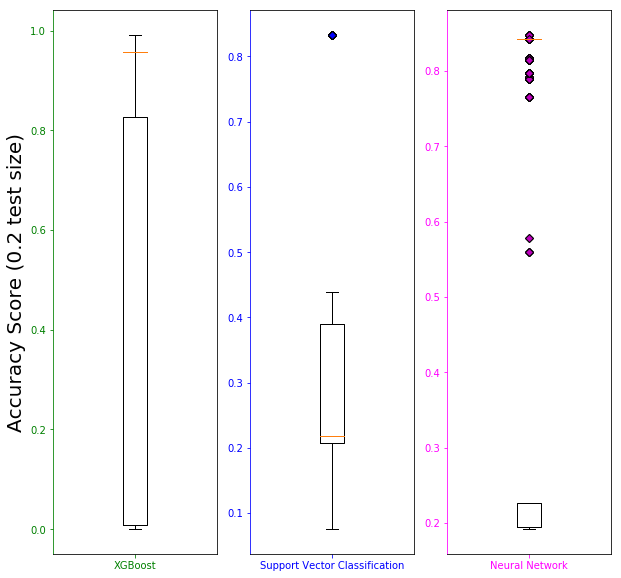

In [64]:
fig = plt.figure(figsize=[10, 10])


ax1 = fig.add_subplot(131)
ax1.boxplot(xgboost_scores, whis=2, usermedians=[0.956963890935888], labels = ['XGBoost'],\
            flierprops = cyan_diamond)
ax1.spines['left'].set_color('green')
ax1.tick_params(axis='both', colors='green', labelsize = 10)
ax1.set_ylabel("Accuracy Score (0.2 test size)", fontsize = 20)


ax2 = fig.add_subplot(132)
ax2.boxplot(svc_scores, whis=2, usermedians=[0.21768607221812822], labels = ['Support Vector Classification'], \
            flierprops = blue_diamond)
ax2.spines['left'].set_color('blue')
ax2.tick_params(axis='both', colors='blue', labelsize=10)

ax3 = fig.add_subplot(133)
ax3.boxplot(neural_network_scores, whis=2, usermedians=[0.8422991893883567], labels = ['Neural Network'], \
            flierprops = magenta_diamond)
ax3.spines['left'].set_color('magenta')
ax3.tick_params(axis='both', colors='magenta', labelsize=10)

plt.show()
fig.savefig("../box_plot_Accuracy_20.png")

In [65]:
xgboost_scores = parse("../cloudwatch/Opt_memory/80_Test/XGBoost_log_768.txt")
svc_scores = parse("../cloudwatch/Opt_memory/80_Test/SVC_log_512.txt")
neural_network_scores = parse("../cloudwatch/Opt_memory/80_Test/Neural_Network_log_432.txt")

../cloudwatch/Opt_memory/80_Test/XGBoost_log_768.txt
../cloudwatch/Opt_memory/80_Test/SVC_log_512.txt
../cloudwatch/Opt_memory/80_Test/Neural_Network_log_432.txt


In [20]:
cyan_diamond = dict(markerfacecolor='c', marker='D')
blue_diamond = dict(markerfacecolor='b', marker='D')
magenta_diamond = dict(markerfacecolor='m', marker='D')

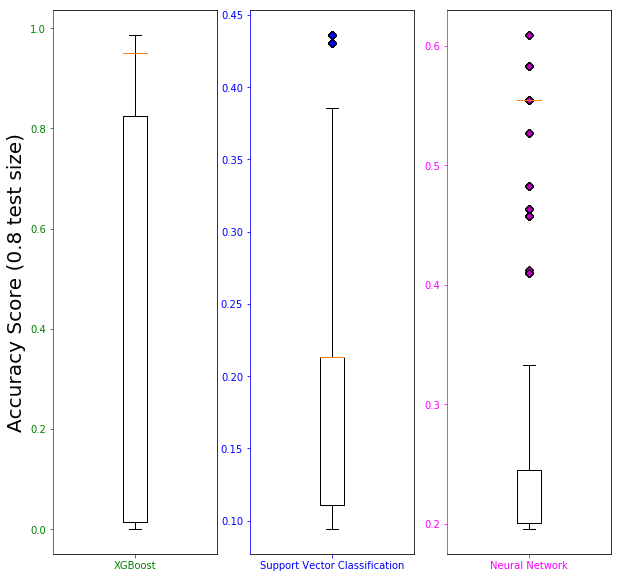

In [66]:
fig = plt.figure(figsize=[10, 10])


ax1 = fig.add_subplot(131)
ax1.boxplot(xgboost_scores, whis=2, usermedians=[0.9507369196757554], labels = ['XGBoost'],\
            flierprops = cyan_diamond)
ax1.spines['left'].set_color('green')
ax1.tick_params(axis='both', colors='green', labelsize = 10)
ax1.set_ylabel("Accuracy Score (0.8 test size)", fontsize = 20)


ax2 = fig.add_subplot(132)
ax2.boxplot(svc_scores, whis=2, usermedians=[0.21308032424465734], labels = ['Support Vector Classification'], \
            flierprops = blue_diamond)
ax2.spines['left'].set_color('blue')
ax2.tick_params(axis='both', colors='blue', labelsize=10)

ax3 = fig.add_subplot(133)
ax3.boxplot(neural_network_scores, whis=2, usermedians=[0.5543846720707443], labels = ['Neural Network'], \
            flierprops = magenta_diamond)
ax3.spines['left'].set_color('magenta')
ax3.tick_params(axis='both', colors='magenta', labelsize=10)

plt.show()
fig.savefig("../box_plot_Accuracy_80.png")

In [67]:
xgboost_scores = parse("../cloudwatch/Opt_memory/999_Test/XGBoost_log_768.txt")
svc_scores = parse("../cloudwatch/Opt_memory/999_Test/SVC_log_512.txt")
neural_network_scores = parse("../cloudwatch/Opt_memory/999_Test/Neural_Network_log_432.txt")

../cloudwatch/Opt_memory/999_Test/XGBoost_log_768.txt
../cloudwatch/Opt_memory/999_Test/SVC_log_512.txt
../cloudwatch/Opt_memory/999_Test/Neural_Network_log_432.txt


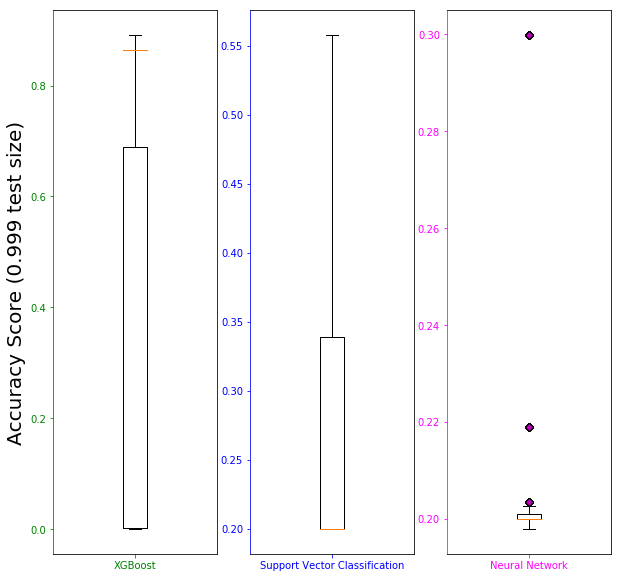

In [68]:
fig = plt.figure(figsize=[10, 10])


ax1 = fig.add_subplot(131)
ax1.boxplot(xgboost_scores, whis=2, usermedians=[0.8637436563200755], labels = ['XGBoost'],\
            flierprops = cyan_diamond)
ax1.spines['left'].set_color('green')
ax1.tick_params(axis='both', colors='green', labelsize = 10)
ax1.set_ylabel("Accuracy Score (0.999 test size)", fontsize = 20)


ax2 = fig.add_subplot(132)
ax2.boxplot(svc_scores, whis=2, usermedians=[0.2001947362209371], labels = ['Support Vector Classification'], \
            flierprops = blue_diamond)
ax2.spines['left'].set_color('blue')
ax2.tick_params(axis='both', colors='blue', labelsize=10)

ax3 = fig.add_subplot(133)
ax3.boxplot(neural_network_scores, whis=2, usermedians=[0.1999586923167709], labels = ['Neural Network'], \
            flierprops = magenta_diamond)
ax3.spines['left'].set_color('magenta')
ax3.tick_params(axis='both', colors='magenta', labelsize=10)

plt.show()
fig.savefig("../box_plot_Accuracy_999.png")

In [69]:
xgboost_mse = parse("../cloudwatch/Opt_memory/20_Test/XGBoost_log_768.txt", "Mean Absolute Error")
prophet_mse = parse("/Users/michaelzhang/Downloads/Seneca/results/prophet/prophet_output.txt", "Metric mse")
multi_regression_mse = parse("../cloudwatch/Opt_Memory/Multi_Regression_log_255.txt", "The MSE of prediction is")

../cloudwatch/Opt_memory/20_Test/XGBoost_log_768.txt
/Users/michaelzhang/Downloads/Seneca/results/prophet/prophet_output.txt
../cloudwatch/Opt_Memory/Multi_Regression_log_255.txt


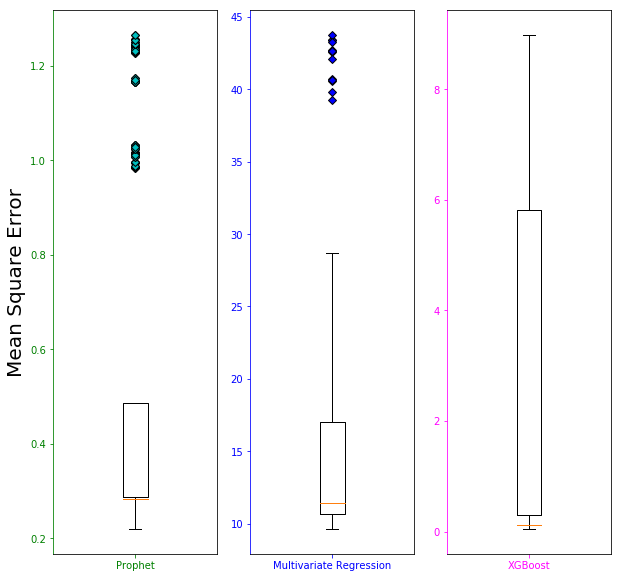

In [70]:
fig = plt.figure(figsize=[10, 10])


ax1 = fig.add_subplot(131)
ax1.boxplot(prophet_mse, whis=2, usermedians=[0.28436439806726066], labels = ['Prophet'],\
            flierprops = cyan_diamond)
ax1.spines['left'].set_color('green')
ax1.tick_params(axis='both', colors='green', labelsize = 10)
ax1.set_ylabel("Mean Square Error", fontsize = 20)


ax2 = fig.add_subplot(132)
ax2.boxplot(multi_regression_mse, whis=2, usermedians=[11.445971625426504], labels = ['Multivariate Regression'], \
            flierprops = blue_diamond)
ax2.spines['left'].set_color('blue')
ax2.tick_params(axis='both', colors='blue', labelsize=10)

ax3 = fig.add_subplot(133)
ax3.boxplot(xgboost_mse, whis=2, usermedians=[0.11894475805820923], labels = ['XGBoost'], flierprops = magenta_diamond)
ax3.spines['left'].set_color('magenta')
ax3.tick_params(axis='both', colors='magenta', labelsize=10)

plt.show()
fig.savefig("./box_plot_MSE.png")

In [246]:
import pandas as pd

In [247]:
df = pd.read_csv("./datasets/xgboost/df_2017_further_reduced.csv")

In [249]:
df.columns

Index(['LR_Diff', 'GradeValue', 'SizerSize', 'SizerGrade', 'CupWeight',
       'Offset', 'Green', 'Dark Green', 'Start of Batch', 'Texture',
       'Stem Area', 'Smoothness', 'Flatness', 'Major Diameter (mm)',
       'Cyclic Rod Number', 'Trip Rod', 'Fruit Center X (mm)',
       'Fruit Center Y (mm)', 'block_Num'],
      dtype='object')